# Setup

In [1]:
# setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#import rpy2

In [2]:
%matplotlib inline
#%load_ext rpy2.ipython

# Lab session: How do we represent $N$ time series in a chart?

Example:

+ let's say we have longitudinal data on start-up revenues;
+ let's say also we want to reveal typical trajectories of start-up growth.

Steps included in this lab:

+ data simulation
+ experimenting with alternative data visualization options:
  - option 1: Dimensionality reduction
  - option 2: Plotting 'everything'
  - option 3: Plotting prototypical trajectories
  - option 4: Plotting individual trajectories by type

In [3]:
# simulate multiple populations of start-ups

# params
# --------------------------

# set seed
np.random.seed(666)

# periods
p = 11

# sub-population size
s = 1000

# simulation 
# -------------------------
# exponentional growth
e = []

for i in range(s):
    for j in np.arange(1, p, 1):
        r = np.exp(j) * np.random.uniform(0.1, 1)
        e.append([i, j, r, 'e'])
        
        
e = pd.DataFrame(e, columns=['i', 'j', 'r', 'g'])


# inverted-u shape
b1, b2 = 4 * 1000, - 4 * 100

u =[]

for i in range(s):
    for j in np.arange(1, p, 1):
        r = (b1 * j + b2 * j ** 2) * np.random.uniform(0.1, 1)
        u.append([i, j, r, 'u'])

        
u = pd.DataFrame(u, columns=['i', 'j', 'r', 'g'])


# log shape
b = 2000

l = []

for i in range(s):
    for j in np.arange(1, p, 1):
        r = b * np.log(j) * np.random.uniform(0.1, 1)
        l.append([i, j, r, 'l'])


l = pd.DataFrame(l, columns=['i', 'j', 'r', 'g'])


# append data
df = pd.concat([e, u, l], axis=0, )

## Option 1: Dimensionality reduction

In [4]:
# collapse data
c = pd.DataFrame(df.groupby('j', as_index=False)['r'].agg(np.mean))

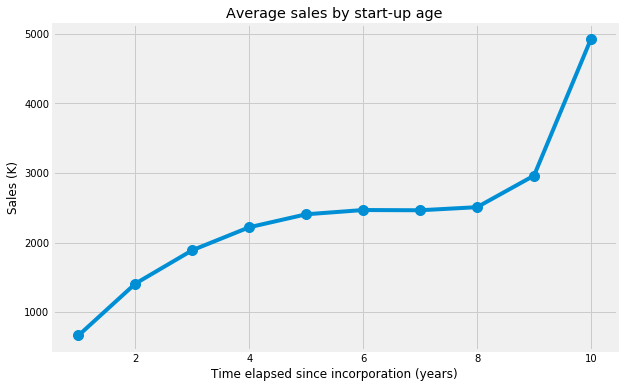

In [5]:
# create figure
fig = plt.figure(figsize=(9, 6))

# add chart
ax = fig.add_subplot(1, 1, 1)

# plot data
x, y = c.j, c.r
ax.plot(x, y, marker='o', markersize=10)

# title
ax.set_title('Average sales by start-up age')

# axes
ax.set_xlabel('Time elapsed since incorporation (years)')
ax.set_ylabel('Sales (K)')

# show plot
plt.show()

## Option 2: Plotting 'everything'

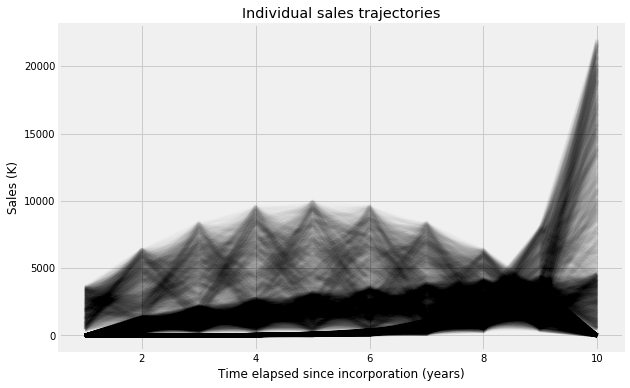

In [6]:
# create figure
fig = plt.figure(figsize=(9, 6))

# add chart
ax = fig.add_subplot(1, 1, 1)

# plot data
x = np.arange(1, 11, 1)

for i in range(s):
    for j in ['e', 'u', 'l']:
        y = df.loc[(df['i'] == i) & (df['g'] == j)]['r'].values
        ax.plot(x, y, color='k', alpha=0.01)

# title
ax.set_title('Individual sales trajectories')

# axes
ax.set_xlabel('Time elapsed since incorporation (years)')
ax.set_ylabel('Sales (K)')
        
# show plot
plt.show()

## Option 3: Plotting prototypical trajectories

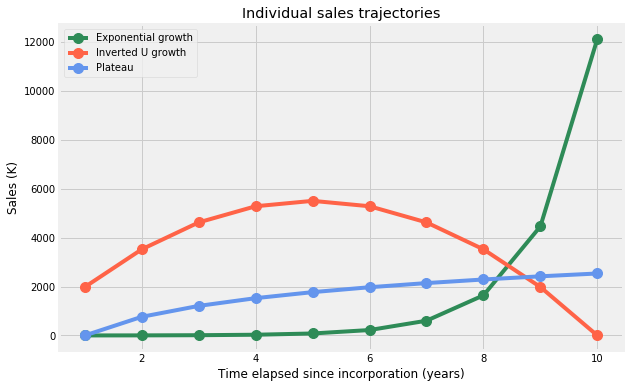

In [7]:
# create figure
fig = plt.figure(figsize=(9, 6))

# add chart
# ax0 = fig.add_subplot(3, 1, 1)
# ax1 = fig.add_subplot(3, 1, 2)
# ax2 = fig.add_subplot(3, 1, 3)
ax = fig.add_subplot(1, 1, 1)

# plot data
x = np.arange(1, 11, 1)

y_e = [0.55 * np.exp(i) for i in np.arange(1, 11, 1)]
ax.plot(x, y_e, color='seagreen', alpha=1, marker='o', markersize=10, label='Exponential growth')
    
y_u = [0.55 * (b1 * x + b2 * x ** 2) for x in np.arange(1, 11, 1)]
ax.plot(x, y_u, color='tomato', alpha=1, marker='o', markersize=10, label='Inverted U growth')

y_l = [0.55 * (b * np.log(x)) for x in np.arange(1, 11, 1)]
ax.plot(x, y_l, color='cornflowerblue', alpha=1, marker='o', markersize=10, label='Plateau')


# legend
ax.legend(loc='best')

# title
ax.set_title('Individual sales trajectories')

# axes
ax.set_xlabel('Time elapsed since incorporation (years)')
ax.set_ylabel('Sales (K)')
        
# show plot
plt.show()

# Option 4: Plotting individual trajectories by type

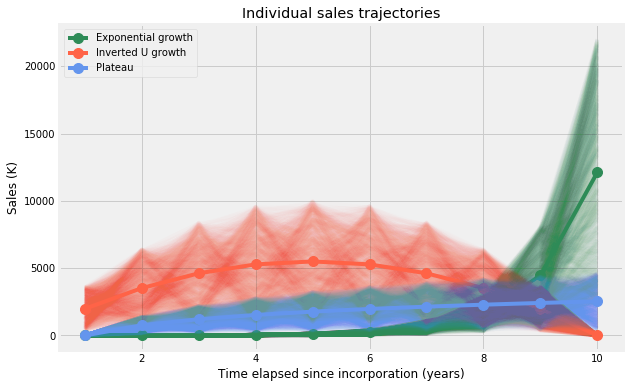

In [8]:
# create figure
fig = plt.figure(figsize=(9, 6))

# add chart
# ax0 = fig.add_subplot(3, 1, 1)
# ax1 = fig.add_subplot(3, 1, 2)
# ax2 = fig.add_subplot(3, 1, 3)
ax = fig.add_subplot(1, 1, 1)

# plot data
x = np.arange(1, 11, 1)

for i in range(s):
    y_obs = df.loc[(df['i'] == i) & (df['g'] == 'e')]['r'].values
    ax.plot(x, y_obs, color='seagreen', alpha=0.01)
    

y_e = [0.55 * np.exp(i) for i in np.arange(1, 11, 1)]
ax.plot(x, y_e, color='seagreen', alpha=1, marker='o',markersize=10, label='Exponential growth')
    

for i in range(s):
    y_obs = df.loc[(df['i'] == i) & (df['g'] == 'u')]['r'].values
    ax.plot(x, y_obs, color='tomato', alpha=0.01)
    

y_u = [0.55 * (b1 * x + b2 * x ** 2) for x in np.arange(1, 11, 1)]
ax.plot(x, y_u, color='tomato', alpha=1, marker='o', markersize=10, label='Inverted U growth')
    

for i in range(s):
    y_obs = df.loc[(df['i'] == i) & (df['g'] == 'l')]['r'].values
    ax.plot(x, y_obs, color='cornflowerblue', alpha=0.01)


y_l = [0.55 * (b * np.log(x)) for x in np.arange(1, 11, 1)]
ax.plot(x, y_l, color='cornflowerblue', alpha=1, marker='o', markersize=10, label='Plateau')


# title
ax.set_title('Individual sales trajectories')

# legend
ax.legend(loc='best')

# axes
ax.set_xlabel('Time elapsed since incorporation (years)')
ax.set_ylabel('Sales (K)')
        
# show plot
plt.show()